In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#from sys import argv

In [2]:
pd.set_option('display.max_columns', None)

# Load data:

In [3]:
df_dels_raw = pd.read_csv('../dataset3/data_main/data_DELS.csv', sep= "\;" ,header=0)# Removed NaNs of Recombination Rate
#! dataset with missing GC and cov Regionrep of Dongs data missing (12/04)

In [4]:
df_dels = df_dels_raw

display(df_dels.head())
print(df_dels.shape)

,CNV_ID,regionA_stat,regionA_end,chr_A,regionB_stat,regionB_end,chr_B,A_size_bp,B_size_bp,A_size,B_size,libraries,A_region_name,A_region_family,A_region_class,B_region_name,B_region_family,B_region_class,A_repitiveRegion_dist,B_repitiveRegion_dist,A_cov_repRegion,B_cov_repRegion,A_SegDup_dist,B_SegDup_dist,A_cov_segDup,B_cov_segDup,sD_pair,dist_Centromere,dist_Telomere,GC_perc_A,GC_perc_B,Dust_A,Dust_B,A_decodeAvg,B_decodeAvg,A_cov_Exons,A_cov_Introns,B_cov_Exons,B_cov_Introns,A_Lamina_score,B_Lamina_score,A_CpGi_dist,B_CpGi_dist,A_TAD_dist_Log,B_TAD_dist_Log,target
0,DGRC_DEL_2162,161068155.0,161071143.0,3,185888761.0,185892124.0,3,2988.0,3363.0,0.001296,0.001458,"siGS,mpGS",MIR,MIR,Rep_SINE,L1ME3,L1,Rep_LINE,0.0,0.0,0.057898,0.664585,0.578837,0.007347,0.0,0.0,False,1.832963,1.127001,0.458097,0.452006,0.000372,0.051534,0.344791,2.031710,0.780455,0.219545,0.0,0.0,0.939476,0.000000,0.117754,0.019176,0.178446,0.011941,True
2,DGRC_DEL_2875,11825837.0,11829427.0,9,12082445.0,12085561.0,9,3590.0,3116.0,0.001556,0.001351,"mpGS,siGS",L1MA4,L1,Rep_LINE,MLT1H1,ERVL-MaLR,Rep_LTR,0.0,0.0,0.324513,0.334403,0.447672,1.003470,0.0,0.0,False,1.493005,1.107869,0.328512,0.338462,0.012140,0.013737,1.535430,1.228380,0.000000,1.000000,0.0,0.0,0.889046,0.896481,0.081797,0.227868,0.451147,0.144400,True
3,DGRC_DEL_1012,26129528.0,26133265.0,1,26138697.0,26140996.0,1,3737.0,2299.0,0.001620,0.000997,liGS,L1MCa,L1,Rep_LINE,AluJb,Alu,Rep_SINE,0.0,0.0,0.911694,0.563723,0.231521,0.175188,0.0,0.0,False,1.984803,1.433342,0.426738,0.448696,0.094375,0.037602,0.896887,0.896887,0.000000,0.000000,0.0,0.0,0.899469,0.892851,0.007365,0.008736,0.037238,0.126782,True
4,DGRC_DEL_135,80934931.0,80935787.0,1,80945300.0,80946029.0,1,856.0,729.0,0.000372,0.000316,liGS,L1MB7,L1,Rep_LINE,L1MB7,L1,Rep_LINE,0.0,0.0,0.574766,0.998628,0.171148,0.170375,0.0,0.0,False,1.620705,1.913421,0.367442,0.317007,0.036770,0.110807,1.815430,1.815430,0.000000,0.000000,0.0,0.0,0.925017,0.925017,0.205131,0.268176,0.239282,0.196997,True
5,DGRC_DEL_930,105469454.0,105473168.0,1,105480888.0,105484047.0,1,3714.0,3159.0,0.001610,0.001370,liGS,L1MA7,L1,Rep_LINE,LTR49-int,ERV1,Rep_LTR,0.0,0.0,0.828487,0.858183,0.430496,0.412131,0.0,0.0,False,1.236011,2.027199,0.383065,0.331122,0.077418,0.084517,0.518749,0.518749,0.000000,0.000000,0.0,0.0,0.913537,0.913537,0.468814,0.203230,0.432882,0.515338,True


(17733, 46)


---

---

### Check mean and std of region A and B size in bps:

In [5]:
df_Dongs = df_dels.loc[(df_dels['CNV_ID'].str.contains('NYGC'))]#[['CNV_ID','A_size_bp','B_size_bp','libraries','target']]
df_DGRC = df_dels.loc[~(df_dels['CNV_ID'].str.contains('NYGC'))&(df_dels['libraries']=='liGS')]#[['CNV_ID','A_size_bp','B_size_bp','libraries','target']]

In [6]:
#Save Dongs deletions for further test:

df_Dongs.drop(['libraries','regionA_stat', 'regionA_end', 'chr_A',
       'regionB_stat', 'regionB_end', 'chr_B','A_size_bp','B_size_bp'], axis=1, inplace=True)

df_Dongs['sD_pair'] = df_Dongs['sD_pair'].astype(int)
#
print(df_Dongs["target"].value_counts())
#Save it:
outPATH = "../dataset3/data_main/DELS_12_04/"
df_Dongs.to_csv(outPATH + 'refined_data_DELS_Dongs-13-04.csv', sep = ';' ,index_label=False)

True    12529
Name: target, dtype: int64


---

In [7]:
df_DGRC["target"].value_counts()

False    1813
True     1206
Name: target, dtype: int64

---

In [8]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==True],df_DGRC['B_size_bp'].loc[df_DGRC['target']==True]]).describe()

count     2412.000000
mean      3103.585821
std       1492.739688
min         25.000000
25%       2483.000000
50%       3145.500000
75%       3694.000000
max      22736.000000
dtype: float64

In [9]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==False],df_DGRC['B_size_bp'].loc[df_DGRC['target']==False]]).describe()

count     3626.000000
mean      5745.584666
std       4073.891599
min          2.000000
25%       2453.500000
50%       5206.000000
75%       8536.250000
max      27440.000000
dtype: float64

In [10]:
#A

In [11]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==True]]).describe()

count     1206.00000
mean      3118.66335
std       1504.23940
min         25.00000
25%       2503.25000
50%       3161.00000
75%       3718.00000
max      22736.00000
Name: A_size_bp, dtype: float64

In [12]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==False]]).describe()

count     1813.000000
mean      5745.825703
std       4083.288765
min         11.000000
25%       2472.000000
50%       5220.000000
75%       8527.000000
max      27440.000000
Name: A_size_bp, dtype: float64

In [13]:
#B

In [14]:
pd.concat([df_DGRC['B_size_bp'].loc[df_DGRC['target']==True]]).describe()

count     1206.000000
mean      3088.508292
std       1481.621250
min         56.000000
25%       2475.250000
50%       3134.000000
75%       3681.750000
max      19863.000000
Name: B_size_bp, dtype: float64

In [15]:
pd.concat([df_DGRC['B_size_bp'].loc[df_DGRC['target']==False]]).describe()

count     1813.000000
mean      5745.343629
std       4065.599283
min          2.000000
25%       2436.000000
50%       5196.000000
75%       8545.000000
max      27005.000000
Name: B_size_bp, dtype: float64

---

---

In [16]:
df_DGRC.isnull().values.any()
#df_DGRC.isnull().sum()

False

In [17]:
df_dels = df_DGRC

---

---

#Checking liGS mead region A and B size for Dongs data , in analisis...
l_A = df_dels['A_size_bp'].loc[df_dels['libraries']=='liGS'].tolist()
l_B = df_dels['B_size_bp'].loc[df_dels['libraries']=='liGS'].tolist()
l_A.extend(l_B)

print(np.mean(l_A)) #2857

---

In [18]:
df_Dongs.shape

(12529, 37)

In [24]:
df_Dongs.loc[(df_Dongs['A_Lamina_score'] == 0) ].shape

(266, 37)

In [27]:
(266 *100)/(12529)

2.1230744672360125

In [25]:
df_Dongs.loc[ (df_Dongs['B_Lamina_score'] == 0)].shape

(269, 37)

In [26]:
(269 *100)/(12529)

2.147018916114614

In [19]:
df_Dongs.loc[(df_Dongs['A_Lamina_score'] == 0) | (df_Dongs['B_Lamina_score'] == 0)]

,CNV_ID,A_size,B_size,A_region_name,A_region_family,A_region_class,B_region_name,B_region_family,B_region_class,A_repitiveRegion_dist,B_repitiveRegion_dist,A_cov_repRegion,B_cov_repRegion,A_SegDup_dist,B_SegDup_dist,A_cov_segDup,B_cov_segDup,sD_pair,dist_Centromere,dist_Telomere,GC_perc_A,GC_perc_B,Dust_A,Dust_B,A_decodeAvg,B_decodeAvg,A_cov_Exons,A_cov_Introns,B_cov_Exons,B_cov_Introns,A_Lamina_score,B_Lamina_score,A_CpGi_dist,B_CpGi_dist,A_TAD_dist_Log,B_TAD_dist_Log,target
6178,NYGC_DEL_6,0.001346,0.001346,L1PA16,L1,Rep_LINE,HAL1,L1,Rep_LINE,0.0,0.0,0.528995,0.963273,0.543944,0.218972,0.0,0.0,0,2.099349,1.351719,0.369453,0.378100,0.032219,0.105320,1.747300,1.747300,0.175580,0.824420,0.000000,1.00000,0.0,0.0,0.316553,0.269604,0.314045,0.359718,True
6253,NYGC_DEL_81,0.001346,0.001346,AluSq,Alu,Rep_SINE,MLT1H,ERVL-MaLR,Rep_LTR,0.0,0.0,0.301869,0.570232,0.642504,0.222928,0.0,0.0,0,1.883278,1.693822,0.462379,0.436393,0.010401,0.037798,1.109410,1.109410,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.048866,0.034133,0.285407,0.009170,True
6302,NYGC_DEL_130,0.001346,0.001346,L1ME3C,L1,Rep_LINE,L1MC5a,L1,Rep_LINE,0.0,0.0,0.689755,0.964562,0.038380,0.236524,0.0,0.0,0,2.164581,0.323316,0.455072,0.466238,0.058344,0.103378,0.000000,0.000000,0.633376,0.366624,0.000000,1.00000,0.0,0.0,0.003473,0.008943,0.091215,0.048705,True
6499,NYGC_DEL_327,0.001346,0.001346,AluSq2,Alu,Rep_SINE,MER57B1,ERV1,Rep_LTR,0.0,0.0,0.834729,0.605992,0.158036,0.178311,0.0,0.0,0,2.014730,0.448668,0.466559,0.426367,0.080445,0.041912,1.738140,1.738140,0.000000,0.000000,0.000000,1.00000,0.0,0.0,0.006017,0.010311,0.160373,0.170581,True
6502,NYGC_DEL_330,0.001346,0.001346,L2a,L2,Rep_LINE,LTR1D,ERV1,Rep_LTR,0.0,0.0,0.812178,1.000000,0.550410,0.412657,0.0,0.0,0,1.972692,1.504169,0.371014,0.372625,0.069744,0.111111,1.034630,1.034630,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.137185,0.057926,0.350752,0.085735,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19779,NYGC_DEL_13607,0.001346,0.001346,LTR47A2,ERVL,Rep_LTR,L1MC,L1,Rep_LINE,0.0,0.0,0.318299,0.182990,0.963541,0.459481,0.0,0.0,0,1.813987,1.783077,0.331511,0.262480,0.014742,0.006175,0.370691,0.370691,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.553494,0.657379,0.175438,0.054950,True
19780,NYGC_DEL_13608,0.001346,0.001346,L1PA6,L1,Rep_LINE,MSTD,ERVL-MaLR,Rep_LTR,0.0,0.0,0.545425,0.507088,0.014021,0.051181,0.0,0.0,0,1.862651,1.723773,0.371383,0.360129,0.036025,0.028843,0.287619,0.287619,0.033183,0.966817,0.383698,0.22616,0.0,0.0,0.043655,0.055095,0.073364,0.142737,True
19782,NYGC_DEL_13610,0.001346,0.001346,L1ME3B,L1,Rep_LINE,L1ME2,L1,Rep_LINE,0.0,0.0,0.734536,0.979059,0.170016,0.154598,0.0,0.0,0,2.073554,0.868492,0.368489,0.404502,0.060807,0.106508,2.770150,2.770150,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.011408,0.123254,0.452092,0.169638,True
19809,NYGC_DEL_13637,0.001346,0.001346,L1M1,L1,Rep_LINE,L1PA2,L1,Rep_LINE,0.0,0.0,0.710052,1.000000,0.664573,0.509821,0.0,0.0,0,1.957056,1.760392,0.383280,0.388406,0.056492,0.111111,0.177857,0.177857,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.297307,0.059948,0.523979,0.276312,True


In [20]:
12529 - 275 

12254

In [21]:
(275 *100)/(12529)

2.194907813871817

---

print(df_dels['libraries'].unique())

df_dels['libraries'] = df_dels['libraries'].apply(lambda x: x.split(','))

# Process libraries data to onehot encoder like format:
df_libraries = pd.get_dummies(df_dels['libraries'].apply(pd.Series).stack(),prefix='librarie').sum(level=0)
display(df_libraries.head(3))

# add libraries in onehot encoder like format:
#df_dels = pd.concat([df_dels,df_libraries],axis=1)
df_dels = df_dels.join(df_libraries)


In [129]:
#display(df_dels.head(1))
#print(df_dels.shape)

In [130]:
#df_dels.loc[df_dels['CNV_ID'].isin(['DGRC_DEL_2875','DGRC_DEL_2162','DGRC_DEL_2535'])] #all ok!

#Place 'target' column in last, just in case:
df_dels.insert(len(df_dels.columns)-1, 'target', df_dels.pop('target'))

#display(df_dels.head(1))
#print(df_dels.shape)

In [131]:
df_dels.drop(['libraries','regionA_stat', 'regionA_end', 'chr_A',
       'regionB_stat', 'regionB_end', 'chr_B','A_size_bp','B_size_bp'], axis=1, inplace=True)

In [132]:
#display(df_dups.head())
#print(df_dups.shape)

# Start Feature Seletion:

Some adjustments to target:

<div class="alert alert-block alert-warning">
<b> Attention: </b> target where *{True:0,False:1}* is just in this notebook, the main dataset for the ML processe will be *{True:1,False:0}* , because it's the correct way!!!
</div>

In [133]:
df_dels["target"] = df_dels["target"].replace({True:0,False:1})
#df_dups["target"] = df_dups["target"].replace({True:0,False:1})

In [134]:
df_dels

,CNV_ID,A_size,B_size,A_region_name,A_region_family,A_region_class,B_region_name,B_region_family,B_region_class,A_repitiveRegion_dist,B_repitiveRegion_dist,A_cov_repRegion,B_cov_repRegion,A_SegDup_dist,B_SegDup_dist,A_cov_segDup,B_cov_segDup,sD_pair,dist_Centromere,dist_Telomere,GC_perc_A,GC_perc_B,Dust_A,Dust_B,A_decodeAvg,B_decodeAvg,A_cov_Exons,A_cov_Introns,B_cov_Exons,B_cov_Introns,A_Lamina_score,B_Lamina_score,A_CpGi_dist,B_CpGi_dist,A_TAD_dist_Log,B_TAD_dist_Log,target
3,DGRC_DEL_1012,0.001620,0.000997,L1MCa,L1,Rep_LINE,AluJb,Alu,Rep_SINE,0.0000,0.0,0.911694,0.563723,0.231521,0.175188,0.000000,0.000000,False,1.984803,1.433342,0.426738,0.448696,0.094375,0.037602,0.896887,0.896887,0.000000,0.000000,0.000000,0.000000,0.899469,0.892851,0.007365,0.008736,0.037238,0.126782,0
4,DGRC_DEL_135,0.000372,0.000316,L1MB7,L1,Rep_LINE,L1MB7,L1,Rep_LINE,0.0000,0.0,0.574766,0.998628,0.171148,0.170375,0.000000,0.000000,False,1.620705,1.913421,0.367442,0.317007,0.036770,0.110807,1.815430,1.815430,0.000000,0.000000,0.000000,0.000000,0.925017,0.925017,0.205131,0.268176,0.239282,0.196997,0
5,DGRC_DEL_930,0.001610,0.001370,L1MA7,L1,Rep_LINE,LTR49-int,ERV1,Rep_LTR,0.0000,0.0,0.828487,0.858183,0.430496,0.412131,0.000000,0.000000,False,1.236011,2.027199,0.383065,0.331122,0.077418,0.084517,0.518749,0.518749,0.000000,0.000000,0.000000,0.000000,0.913537,0.913537,0.468814,0.203230,0.432882,0.515338,0
6,DGRC_DEL_697,0.001373,0.001369,THE1D,ERVL-MaLR,Rep_LTR,HAL1,L1,Rep_LINE,0.0000,0.0,0.374289,0.851172,0.535198,0.358772,0.000000,0.000000,False,1.022754,2.053611,0.449211,0.403165,0.026068,0.080508,1.660020,1.660020,0.000000,0.000000,0.000000,0.000000,0.901789,0.901789,0.062338,0.090121,0.231852,0.077273,0
7,DGRC_DEL_516,0.000598,0.000957,L1ME1,L1,Rep_LINE,LTR14B,ERVK,Rep_LTR,0.0000,0.0,0.578794,0.367014,0.000398,0.067159,0.000000,0.000000,False,1.454584,1.988241,0.329710,0.421670,0.061117,0.018873,0.765710,0.765710,0.000000,0.000000,0.000000,0.000000,0.946181,0.946181,0.027652,0.215115,0.187954,0.230456,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,DGRC_DEL_1190,0.001779,0.001195,Rep_Simple_repeat,(TGTGA)n,Simple_repeat,(GCCTCT)n,Simple_repeat,Rep_Simple_repeat,0.0029,0.0,0.000000,0.011248,0.000000,0.000000,0.999513,0.429608,True,1.943241,0.488757,0.618248,0.589855,0.111111,0.020492,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.913996,0.913996,0.004547,0.009755,0.088022,0.205471,0
19991,DGRC_DEL_1092,0.003078,0.000167,MER4A1,ERV1,Rep_LTR,MIRb,MIR,Rep_SINE,0.0000,0.0,0.321102,0.264935,0.047828,290.956983,0.000000,0.000000,False,1.772647,0.208145,0.523963,0.589744,0.025186,0.007759,0.780240,0.780240,0.000000,1.000000,0.000000,1.000000,0.913646,0.913646,0.000000,0.003060,0.024148,0.210723,0
19992,DGRC_DEL_1434,0.001695,0.002702,AluSg,Alu,Rep_SINE,MER1A,hAT-Charlie,Rep_DNA,0.0000,0.0,0.110742,0.260695,0.160313,290.956983,0.000000,0.000000,False,1.775036,0.110595,0.442656,0.535629,0.003310,0.023212,0.780240,0.780240,0.178261,0.821739,0.088447,0.911553,0.941108,0.941108,0.013881,0.000000,0.142151,0.111859,0
19993,DGRC_DEL_1291,0.003563,0.001648,MER5A1,hAT-Charlie,Rep_DNA,MER5A1,hAT-Charlie,Rep_DNA,0.0000,0.0,0.056082,0.058127,0.000000,0.000000,1.000000,1.000000,False,0.340129,2.164332,0.350637,0.363732,0.000362,0.000277,0.092489,0.092489,0.048555,0.951445,0.052604,0.947396,0.919415,0.919415,0.027908,0.144720,0.008674,0.122482,0


## Check for outliers:

def look_for_outliers(dataframe):
    """
    """
    target = dataframe.columns[-1]
    #display(dataframe[target])
    cols = dataframe.drop(["CNV_ID"], axis=1).columns
    for var in cols:
        data = pd.concat([dataframe[target], dataframe[var]], axis=1)
        data.plot.scatter(x=var, y=target, ylim=(-1,3), xlim=(dataframe[var].min(),dataframe[var].max()),figsize=(26, 4))

    

look_for_outliers(df_dels)

In [135]:
#look_for_outliers(df_dups)

## PCA:

In [166]:
#prepdata:
df_del_PCA = df_dels.copy()
df_del_PCA[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']] = df_del_PCA[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']].stack().rank(method='dense').unstack()
#df_del_PCA[['sD_pair_A','sD_pair_B']] = df_del_PCA[['sD_pair_A','sD_pair_B']].stack().rank(method='dense').unstack()
df_del_PCA['sD_pair'] = df_del_PCA['sD_pair'].astype(int)

#df_del_PCA = df_del_PCA.drop(['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class','sD_pair'],axis=1)


df_del_PCA

,CNV_ID,A_size,B_size,A_region_name,A_region_family,A_region_class,B_region_name,B_region_family,B_region_class,A_repitiveRegion_dist,B_repitiveRegion_dist,A_cov_repRegion,B_cov_repRegion,A_SegDup_dist,B_SegDup_dist,A_cov_segDup,B_cov_segDup,sD_pair,dist_Centromere,dist_Telomere,GC_perc_A,GC_perc_B,Dust_A,Dust_B,A_decodeAvg,B_decodeAvg,A_cov_Exons,A_cov_Introns,B_cov_Exons,B_cov_Introns,A_Lamina_score,B_Lamina_score,A_CpGi_dist,B_CpGi_dist,A_TAD_dist_Log,B_TAD_dist_Log,target
3,DGRC_DEL_1012,0.001620,0.000997,269.0,220.0,714.0,101.0,100.0,721.0,0.0000,0.0,0.911694,0.563723,0.231521,0.175188,0.000000,0.000000,0,1.984803,1.433342,0.426738,0.448696,0.094375,0.037602,0.896887,0.896887,0.000000,0.000000,0.000000,0.000000,0.899469,0.892851,0.007365,0.008736,0.037238,0.126782,0
4,DGRC_DEL_135,0.000372,0.000316,259.0,220.0,714.0,259.0,220.0,714.0,0.0000,0.0,0.574766,0.998628,0.171148,0.170375,0.000000,0.000000,0,1.620705,1.913421,0.367442,0.317007,0.036770,0.110807,1.815430,1.815430,0.000000,0.000000,0.000000,0.000000,0.925017,0.925017,0.205131,0.268176,0.239282,0.196997,0
5,DGRC_DEL_930,0.001610,0.001370,251.0,220.0,714.0,434.0,168.0,715.0,0.0000,0.0,0.828487,0.858183,0.430496,0.412131,0.000000,0.000000,0,1.236011,2.027199,0.383065,0.331122,0.077418,0.084517,0.518749,0.518749,0.000000,0.000000,0.000000,0.000000,0.913537,0.913537,0.468814,0.203230,0.432882,0.515338,0
6,DGRC_DEL_697,0.001373,0.001369,748.0,174.0,715.0,186.0,220.0,714.0,0.0000,0.0,0.374289,0.851172,0.535198,0.358772,0.000000,0.000000,0,1.022754,2.053611,0.449211,0.403165,0.026068,0.080508,1.660020,1.660020,0.000000,0.000000,0.000000,0.000000,0.901789,0.901789,0.062338,0.090121,0.231852,0.077273,0
7,DGRC_DEL_516,0.000598,0.000957,278.0,220.0,714.0,366.0,170.0,715.0,0.0000,0.0,0.578794,0.367014,0.000398,0.067159,0.000000,0.000000,0,1.454584,1.988241,0.329710,0.421670,0.061117,0.018873,0.765710,0.765710,0.000000,0.000000,0.000000,0.000000,0.946181,0.946181,0.027652,0.215115,0.187954,0.230456,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,DGRC_DEL_1190,0.001779,0.001195,723.0,86.0,741.0,61.0,741.0,723.0,0.0029,0.0,0.000000,0.011248,0.000000,0.000000,0.999513,0.429608,1,1.943241,0.488757,0.618248,0.589855,0.111111,0.020492,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.913996,0.913996,0.004547,0.009755,0.088022,0.205471,0
19991,DGRC_DEL_1092,0.003078,0.000167,544.0,168.0,715.0,621.0,618.0,721.0,0.0000,0.0,0.321102,0.264935,0.047828,290.956983,0.000000,0.000000,0,1.772647,0.208145,0.523963,0.589744,0.025186,0.007759,0.780240,0.780240,0.000000,1.000000,0.000000,1.000000,0.913646,0.913646,0.000000,0.003060,0.024148,0.210723,0
19992,DGRC_DEL_1434,0.001695,0.002702,108.0,100.0,721.0,502.0,787.0,712.0,0.0000,0.0,0.110742,0.260695,0.160313,290.956983,0.000000,0.000000,0,1.775036,0.110595,0.442656,0.535629,0.003310,0.023212,0.780240,0.780240,0.178261,0.821739,0.088447,0.911553,0.941108,0.941108,0.013881,0.000000,0.142151,0.111859,0
19993,DGRC_DEL_1291,0.003563,0.001648,573.0,787.0,712.0,573.0,787.0,712.0,0.0000,0.0,0.056082,0.058127,0.000000,0.000000,1.000000,1.000000,0,0.340129,2.164332,0.350637,0.363732,0.000362,0.000277,0.092489,0.092489,0.048555,0.951445,0.052604,0.947396,0.919415,0.919415,0.027908,0.144720,0.008674,0.122482,0


In [167]:
# libraries columns has to be removed for PCA R script:
#df_del_PCA.drop(['librarie_liGS','librarie_mpGS','librarie_siGS'], axis=1, inplace=True)

In [168]:
#Save it:
outPATH = "./datasetPCA/deletions/"
df_del_PCA.to_csv(outPATH + 'del_PCA_liGS.csv', sep = ';' ,index_label=False)

In [169]:
#/

In [170]:
from sklearn.decomposition import PCA

In [171]:
#X

## TRUE

In [161]:
X = df_dels.loc[df_dels["target"] == 0]
y =  df_dels["target"].loc[df_dels["target"] == 0]

X = X.drop("target",axis=1)

X = X.drop("CNV_ID",axis=1)
##X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']] = X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']].stack().rank(method='dense').unstack()
#X[['sD_pair_A','sD_pair_B']] = X[['sD_pair_A','sD_pair_B']].stack().rank(method='dense').unstack()
##X['sD_pair'] = X['sD_pair'].astype(int)

X = X.drop(['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class','sD_pair'],axis=1)

# Scale data befor applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(X)
Scaled_data=scaling.transform(X)


# Set the n_components=3
principal=PCA(n_components=2)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)
'''
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
'''

(1206, 2)


'\npca = PCA(n_components=2)\npca.fit(X)\nprint(pca.explained_variance_ratio_)\n'

In [162]:
# Check the values of eigen vectors
# prodeced by principal components
principal.components_

array([[-0.05858914, -0.06096164,  0.10663377,  0.08162957, -0.19129091,
        -0.14671663, -0.00776797,  0.04769582,  0.09956091,  0.09726935,
         0.12656599, -0.31580337,  0.34757771,  0.33942255, -0.16669596,
        -0.1081464 ,  0.27865961,  0.27878252,  0.19814452,  0.12117793,
         0.17600279,  0.12392191, -0.12900014, -0.12835875, -0.2876054 ,
        -0.27157451, -0.16857191, -0.17345083],
       [-0.08525249, -0.07164066,  0.03661047,  0.03813199,  0.22460215,
         0.26690415,  0.01207532, -0.04097896,  0.29347661,  0.30617579,
        -0.26516616,  0.13063284,  0.17448971,  0.16609434,  0.2510725 ,
         0.30074787, -0.09886188, -0.09813408,  0.1390809 , -0.22367578,
         0.14068612, -0.22764606,  0.22857066,  0.22980073, -0.20858053,
        -0.20447128, -0.09776538, -0.14901817]])

Text(0, 0.5, 'pc2')

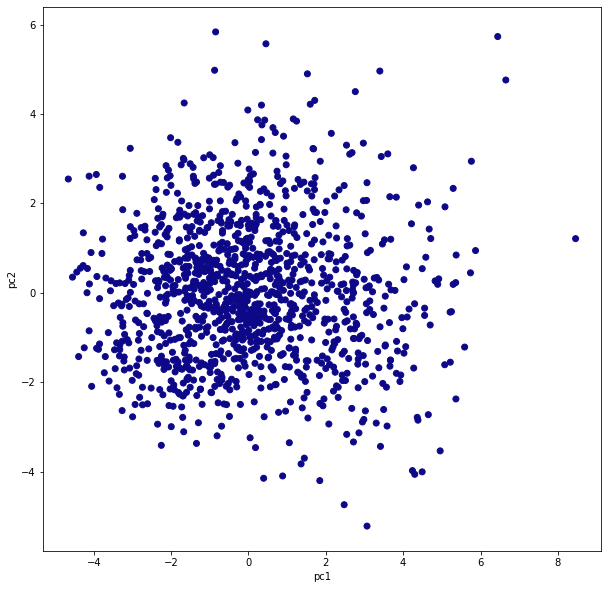

In [163]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=y,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

## FALSE:

In [164]:
X = df_dels.loc[df_dels["target"] == 1]
y =  df_dels["target"].loc[df_dels["target"] == 1]

X = X.drop("target",axis=1)

X = X.drop("CNV_ID",axis=1)
##X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']] = X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']].stack().rank(method='dense').unstack()
#X[['sD_pair_A','sD_pair_B']] = X[['sD_pair_A','sD_pair_B']].stack().rank(method='dense').unstack()
##X['sD_pair'] = X['sD_pair'].astype(int)

X = X.drop(['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class','sD_pair'],axis=1)

# Scale data befor applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(X)
Scaled_data=scaling.transform(X)


# Set the n_components=3
principal=PCA(n_components=2)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)
'''
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
'''

(1813, 2)


'\npca = PCA(n_components=2)\npca.fit(X)\nprint(pca.explained_variance_ratio_)\n'

Text(0, 0.5, 'pc2')

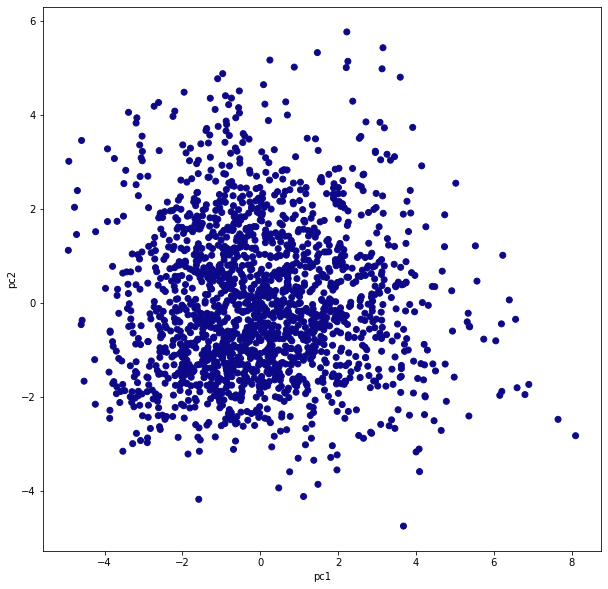

In [165]:
#1
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=y,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

### Using PCA R script:

In [151]:
from IPython.display import Image
from IPython.core.display import HTML 

TP deletions:

In [152]:
Image(url= "./datasetPCA/deletions/tp_scaled.png")

In [153]:
Image(url= "./datasetPCA/deletions/tp_labels.png") #old

FP deletions:

In [154]:
Image(url= "./datasetPCA/deletions/fp_scaled.png")

In [155]:
Image(url= "./datasetPCA/deletions/fp_labels.png")

# Remove outliers:

In [172]:
Image(url= "./datasetPCA/deletions/tp_scaled_dots.png")

In [173]:
Image(url= "./datasetPCA/deletions/tp_labels_marked.png")#old

In [174]:
#________________________________

In [175]:
Image(url= "./datasetPCA/deletions/fp_scaled_dots.png")

In [176]:
Image(url= "./datasetPCA/deletions/fp_labels_marked.png")

In [177]:
#Outliers to remove:
l_outliersIDs = ["DGRC_DEL_240",
                 "fp_1730","fp_1129"]
#df_dels[df_dels['CNV_ID'].isin(l_outliersIDs)]

In [178]:
df_dels = df_dels[~df_dels['CNV_ID'].isin(l_outliersIDs)]

# Save current dataset:

<div class="alert alert-block alert-warning">
<b> Attention: </b> target where *{True:0,False:1}* is just in this notebook, the main dataset for the ML processe will be *{True:1,False:0}* , because it's the correct way!!!
</div>

In [179]:
#df_dels["target"] = df_dels["target"].replace({True:0,False:1})
df_dels["target"] = df_dels["target"].replace({0:True,1:False}) #resverse it
#df_dels["target"] = df_dels["target"].astype(int)
#df_dups["target"] = df_dups["target"].replace({True:0,False:1})

In [180]:
#df_dels.loc[df_dels.target==1].head(1)

In [181]:
#df_dels.loc[df_dels.target==0].head(1)

***

In [182]:
df_dels["target"] = df_dels["target"].astype(int)

In [183]:
df_dels[['CNV_ID','target']].loc[df_dels.target==1].head(1)

,CNV_ID,target
3,DGRC_DEL_1012,1


In [184]:
df_dels[['CNV_ID','target']].loc[df_dels.target==0].head(1)

,CNV_ID,target
1386,fp_746,0


***

In [186]:
#SAVE it!!!
outPATH = "../dataset3/data_main/"
df_dels.to_csv(outPATH + 'refined_data_DELS_liGS-13-04.csv', sep = ';' ,index_label=False)

# -----------------------------------------------------------------------------

# Feature Importance:

Feature: 0 A_size, Score: 0.15169
Feature: 1 B_size, Score: 0.17839
Feature: 2 A_region_name, Score: 0.02071
Feature: 3 A_region_family, Score: 0.01181
Feature: 4 A_region_class, Score: 0.00807
Feature: 5 B_region_name, Score: 0.01895
Feature: 6 B_region_family, Score: 0.01187
Feature: 7 B_region_class, Score: 0.00782
Feature: 8 A_repitiveRegion_dist, Score: 0.00167
Feature: 9 B_repitiveRegion_dist, Score: 0.00198
Feature: 10 A_cov_repRegion, Score: 0.02927
Feature: 11 B_cov_repRegion, Score: 0.02311
Feature: 12 A_SegDup_dist, Score: 0.02729
Feature: 13 B_SegDup_dist, Score: 0.02811
Feature: 14 A_cov_segDup, Score: 0.00741
Feature: 15 B_cov_segDup, Score: 0.00876
Feature: 16 sD_pair, Score: 0.00154
Feature: 17 dist_Centromere, Score: 0.02360
Feature: 18 dist_Telomere, Score: 0.02584
Feature: 19 GC_perc_A, Score: 0.02499
Feature: 20 GC_perc_B, Score: 0.02207
Feature: 21 Dust_A, Score: 0.02805
Feature: 22 Dust_B, Score: 0.02233
Feature: 23 A_decodeAvg, Score: 0.01813
Feature: 24 B_decode

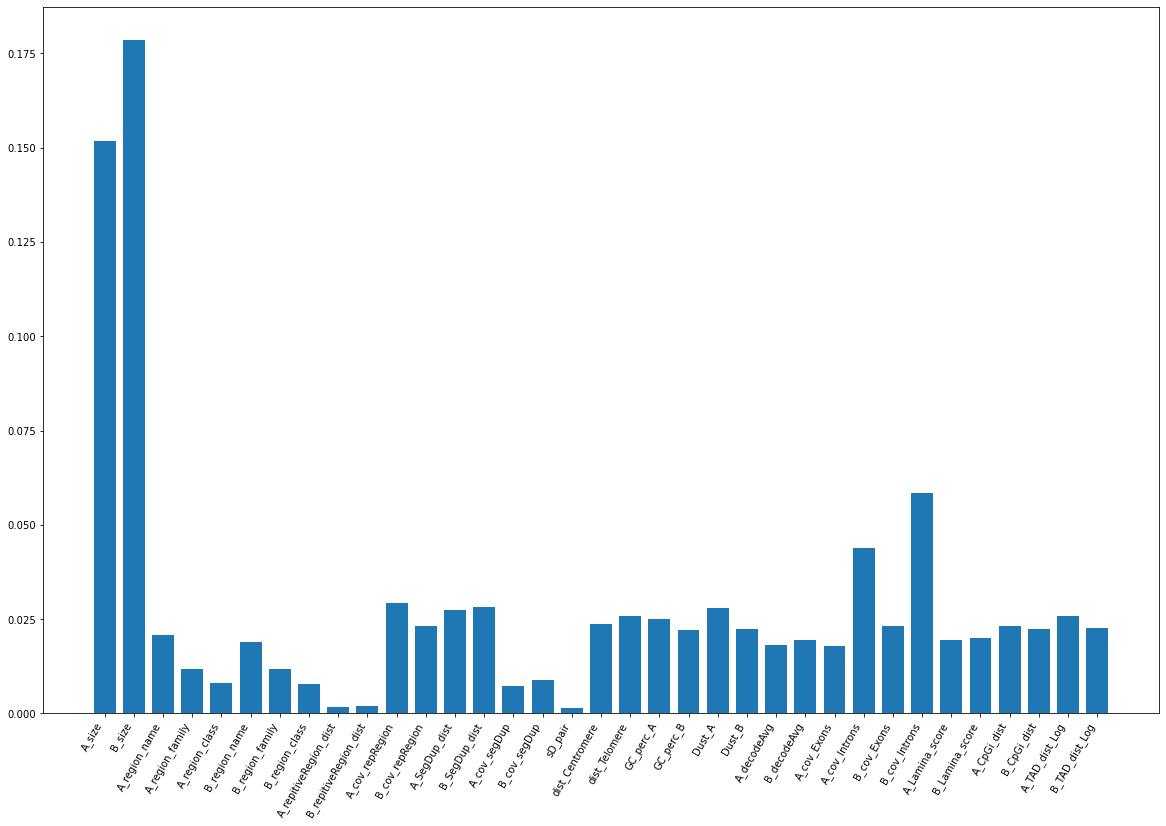

In [187]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = df_dels.drop(["target","CNV_ID"], axis = 1), df_dels["target"]

#Must adapt caregorical:
X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']] = X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']].stack().rank(method='dense').unstack()
X['sD_pair'] = X['sD_pair'].astype(int)
list_features = X.columns.to_list()

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s %s, Score: %.5f' % (i,list_features[i],v))
# plot feature importance
pyplot.figure(figsize=(20, 13))
pyplot.bar([x for x in range(len(importance))], importance,tick_label=X.columns,width = 0.75 )
#pyplot.bar([x for x in range(list_features)], importance)
pyplot.xticks(rotation=60,horizontalalignment='right')
pyplot.rcParams.update({'font.size': 18})

pyplot.show()

# Since librarie_mpGS column has no importance score: #because theres no FP deletion from the librarie_mpGS.
#df_dels.loc[df_dels['librarie_mpGS']==1]

#by the results, remove librarie_mpGS and its rows:

#Drop the rows:
#df_dels[].loc[df_dels['librarie_mpGS']==1]
to_drop = df_dels.loc[df_dels['CNV_ID'].isin(['DGRC_DEL_2162','DGRC_DEL_4358','DGRC_DEL_2535','DGRC_DEL_2875'])].index
df_dels.drop(to_drop, inplace=True)


#Drop the coluns
df_dels.drop(['librarie_mpGS'], axis=1, inplace=True)



In [189]:
#df_dels.loc[df_dels['CNV_ID'].isin(['DGRC_DEL_2162','DGRC_DEL_4358','DGRC_DEL_2535','DGRC_DEL_2875'])]
df_dels.head(2)

,CNV_ID,A_size,B_size,A_region_name,A_region_family,A_region_class,B_region_name,B_region_family,B_region_class,A_repitiveRegion_dist,B_repitiveRegion_dist,A_cov_repRegion,B_cov_repRegion,A_SegDup_dist,B_SegDup_dist,A_cov_segDup,B_cov_segDup,sD_pair,dist_Centromere,dist_Telomere,GC_perc_A,GC_perc_B,Dust_A,Dust_B,A_decodeAvg,B_decodeAvg,A_cov_Exons,A_cov_Introns,B_cov_Exons,B_cov_Introns,A_Lamina_score,B_Lamina_score,A_CpGi_dist,B_CpGi_dist,A_TAD_dist_Log,B_TAD_dist_Log,target
3,DGRC_DEL_1012,0.001620,0.000997,L1MCa,L1,Rep_LINE,AluJb,Alu,Rep_SINE,0.0,0.0,0.911694,0.563723,0.231521,0.175188,0.0,0.0,False,1.984803,1.433342,0.426738,0.448696,0.094375,0.037602,0.896887,0.896887,0.0,0.0,0.0,0.0,0.899469,0.892851,0.007365,0.008736,0.037238,0.126782,1
4,DGRC_DEL_135,0.000372,0.000316,L1MB7,L1,Rep_LINE,L1MB7,L1,Rep_LINE,0.0,0.0,0.574766,0.998628,0.171148,0.170375,0.0,0.0,False,1.620705,1.913421,0.367442,0.317007,0.036770,0.110807,1.815430,1.815430,0.0,0.0,0.0,0.0,0.925017,0.925017,0.205131,0.268176,0.239282,0.196997,1


In [51]:
#SAVE it!!!
outPATH = "./dataset3/data_main/"
#df_dels.to_csv(outPATH + 'refined_data_DELS.csv', sep = ';' ,index_label=False)

### Make dataset by removing the feature with the lowest importance: 

**not in use!!!**

In [52]:
#df_superR_dels = df_dels
#low_impfeatures = ['A_repitiveRegion_dist','B_repitiveRegion_dist',
#                       'A_cov_segDup','B_cov_segDup',
#                       'sD_pair_A','sD_pair_B',
#                       'A_cov_Exons','A_cov_Introns',
#                       'B_cov_Exons','B_cov_Introns']
#df_superR_dels  = df_superR_dels.drop(low_impfeatures, axis = 1)

In [53]:
#SAVE it!!!
#outPATH = "./dataset3/data_main/"


#df_superR_dels.to_csv(outPATH + 'super_refined_data_DELS.csv', sep = ';' ,index_label=False)

***

### Check mean and std of region A and B size in bps:

In [203]:
df_DGRC = pd.read_csv('../dataset3/data_main/data_DELS.csv', sep= "\;" ,header=0)

In [204]:
df_DGRC = df_DGRC.loc[~(df_DGRC['CNV_ID'].str.contains('NYGC'))&(df_DGRC['libraries']=='liGS')]#[['CNV_ID','A_size_bp','B_size_bp','libraries','target']]

In [205]:
df_DGRC["target"].value_counts()

False    1813
True     1206
Name: target, dtype: int64

In [206]:
#Outliers to decided to remove:
l_outliersIDs = ["DGRC_DEL_240",
                 "fp_1730","fp_1129"]
#df_dels[df_dels['CNV_ID'].isin(l_outliersIDs)]
df_DGRC = df_DGRC[~df_DGRC['CNV_ID'].isin(l_outliersIDs)]

In [207]:
df_DGRC["target"].value_counts()

False    1811
True     1205
Name: target, dtype: int64

---

In [208]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==True],df_DGRC['B_size_bp'].loc[df_DGRC['target']==True]]).describe()

count     2410.000000
mean      3103.084647
std       1493.256242
min         25.000000
25%       2483.000000
50%       3145.000000
75%       3693.750000
max      22736.000000
dtype: float64

In [209]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==False],df_DGRC['B_size_bp'].loc[df_DGRC['target']==False]]).describe()

count     3622.000000
mean      5746.559912
std       4075.542289
min          2.000000
25%       2450.000000
50%       5206.000000
75%       8541.750000
max      27440.000000
dtype: float64

In [210]:
#A

In [211]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==True]]).describe()

count     1205.000000
mean      3118.235685
std       1504.790604
min         25.000000
25%       2503.000000
50%       3160.000000
75%       3718.000000
max      22736.000000
Name: A_size_bp, dtype: float64

In [212]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==False]]).describe()

count     1811.000000
mean      5746.743236
std       4084.932171
min         11.000000
25%       2469.000000
50%       5220.000000
75%       8528.500000
max      27440.000000
Name: A_size_bp, dtype: float64

In [213]:
#B

In [214]:
pd.concat([df_DGRC['B_size_bp'].loc[df_DGRC['target']==True]]).describe()

count     1205.00000
mean      3087.93361
std       1482.10194
min         56.00000
25%       2475.00000
50%       3134.00000
75%       3681.00000
max      19863.00000
Name: B_size_bp, dtype: float64

In [215]:
pd.concat([df_DGRC['B_size_bp'].loc[df_DGRC['target']==False]]).describe()

count     1811.000000
mean      5746.376588
std       4067.259005
min          2.000000
25%       2435.000000
50%       5196.000000
75%       8555.000000
max      27005.000000
Name: B_size_bp, dtype: float64

---

In [217]:
df_DGRC.drop(['libraries','regionA_stat', 'regionA_end', 'chr_A',
       'regionB_stat', 'regionB_end', 'chr_B','A_size_bp','B_size_bp'], axis=1, inplace=True)

In [219]:
#SAVE it!!!
outPATH = "../dataset3/data_main/DELS_12_04/"
df_DGRC.to_csv(outPATH + 'refined_data_DELS_liGS-13-04.csv', sep = ';' ,index_label=False)